In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import datasets

%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
y_true = y_test

In [3]:
# parsing through the dataset

img_row, img_cols = 28,28
input_shape = (img_row, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0],img_cols,img_row,1)

x_test = x_test.reshape(x_test.shape[0],img_cols,img_row,1)


print("Train set shape", x_train.shape, 'trainlabel shape', y_train.shape)
print('test set shape', x_test.shape, 'test labels:', y_test.shape)

Train set shape (60000, 28, 28, 1) trainlabel shape (60000,)
test set shape (10000, 28, 28, 1) test labels: (10000,)


In [4]:
# split the train set to validatation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)
print('Val_set shape:', x_val.shape, 'val_label shape:', y_val.shape)
print('Test_set shape:', x_test.shape, 'y_test shape:', y_test.shape)

X_train shape: (48000, 28, 28, 1) X_label shape: (48000,)
Val_set shape: (12000, 28, 28, 1) val_label shape: (12000,)
Test_set shape: (10000, 28, 28, 1) y_test shape: (10000,)


In [5]:
# normalization of data
x_train = x_train / 255. 

x_val = x_val / 255.

x_test = x_test / 255.

In [6]:
#num_labels = 10
# formatting the data for model input


y_train = keras.utils.to_categorical(y_train)

print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)

y_test = keras.utils.to_categorical(y_test)

print('test set shape:', x_test.shape, 'test label shape', y_test.shape)

y_val = keras.utils.to_categorical(y_val)

print('val set shape:', x_val.shape, 'val_lavels shape:', y_val.shape)

X_train shape: (48000, 28, 28, 1) X_label shape: (48000, 10)
test set shape: (10000, 28, 28, 1) test label shape (10000, 10)
val set shape: (12000, 28, 28, 1) val_lavels shape: (12000, 10)


In [7]:
## Defining a model architecture

batch_size = 16
num_classes = 10
epochs = 50
input_img = Input(shape=(28,28,1))
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',
                 input_shape=(28,28,1)))

model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [9]:
hist = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose=1, validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 23s 488us/step - loss: 0.6159 - acc: 0.7718 - val_loss: 0.3831 - val_acc: 0.8639
Epoch 2/50
48000/48000 [==============================] - 15s 307us/step - loss: 0.4141 - acc: 0.8478 - val_loss: 0.3209 - val_acc: 0.8824
Epoch 3/50
48000/48000 [==============================] - 15s 304us/step - loss: 0.3728 - acc: 0.8634 - val_loss: 0.3215 - val_acc: 0.8786
Epoch 4/50
48000/48000 [==============================] - 14s 302us/step - loss: 0.3470 - acc: 0.8733 - val_loss: 0.2961 - val_acc: 0.8937
Epoch 5/50
48000/48000 [==============================] - 15s 303us/step - loss: 0.3327 - acc: 0.8770 - val_loss: 0.2737 - val_acc: 0.9012
Epoch 6/50
48000/48000 [==============================] - 15s 312us/step - loss: 0.3226 - acc: 0.8820 - val_loss: 0.2672 - val_acc: 0.9024
Epoch 7/50
48000/48000 [==============================] - 15s 316us/step - loss: 0.3135 - acc: 0.8850 - val_loss: 0.

In [10]:
score = model.evaluate(x_test, y_test, verbose= 1)

10000/10000 [==============================] - 0s 47us/step


In [11]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29845439777374266
Test accuracy: 0.8936


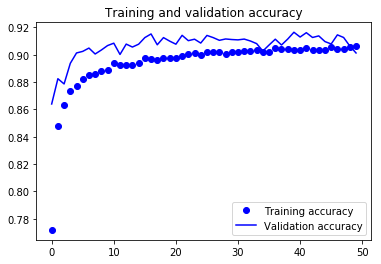

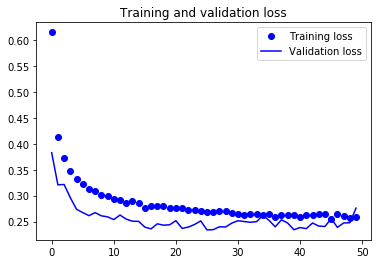

In [12]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

#get the indices to be plotted

correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [14]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.91      0.76      0.83      1000
    Class 1       0.98      0.98      0.98      1000
    Class 2       0.91      0.76      0.83      1000
    Class 3       0.90      0.92      0.91      1000
    Class 4       0.83      0.80      0.82      1000
    Class 5       0.98      0.98      0.98      1000
    Class 6       0.61      0.83      0.71      1000
    Class 7       0.96      0.96      0.96      1000
    Class 8       0.98      0.97      0.98      1000
    Class 9       0.96      0.97      0.97      1000

avg / total       0.90      0.89      0.90     10000



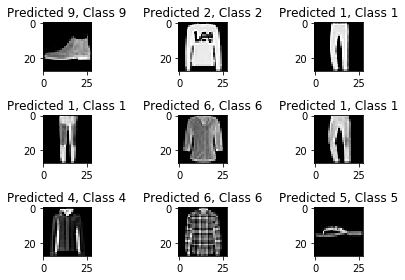

In [15]:
for i, c in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[c], y_true[c]))
    plt.tight_layout()

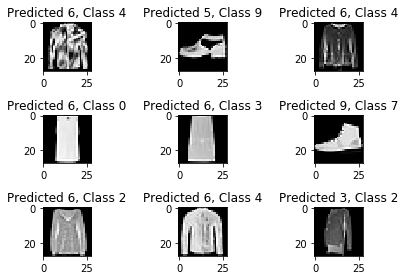

In [16]:
for i, inc in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[inc].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[inc], y_true[inc]))
    plt.tight_layout()

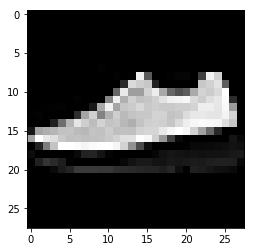

In [17]:
test_im = x_train[130]
plt.imshow(test_im.reshape(28,28), cmap='gray', interpolation='none')
plt.show()

C:\Anaconda2\envs\tensor\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  app.launch_new_instance()


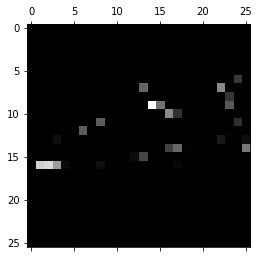

In [18]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='gray')

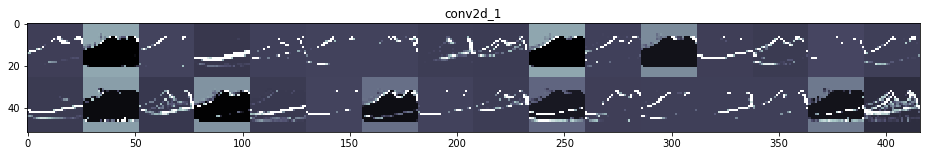

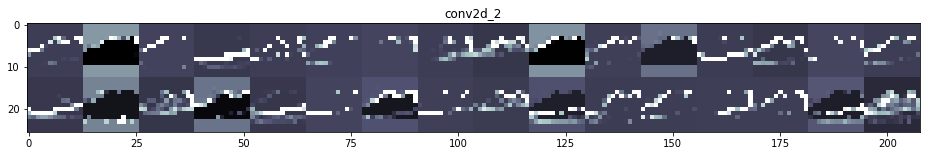

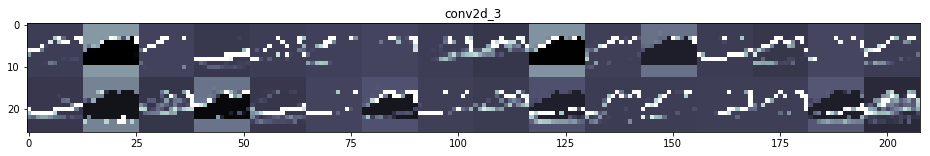

In [19]:
layer_names = []
for layer in model.layers[:-1]:
    if isinstance(layer, Conv2D):
        layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features / images_per_row
    n_cols = int(n_cols)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='bone')